#Importando as bibliotecas

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import statsmodels.api as sm
from scipy import stats

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.anova import anova_lm

plt.rcParams['figure.figsize'] = [6, 4]

import graphs

##Estatística Descritiva

In [ ]:
rest = pd.read_csv('/content/resultado.csv')

### Checando Missing Values e Tendencia Central

Carregando e vizualizando o Dataset

In [ ]:
rest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             505 non-null    int64  
 1   Symbol                 505 non-null    object 
 2   Security               505 non-null    object 
 3   SEC filings            505 non-null    object 
 4   GICS Sector            505 non-null    object 
 5   GICS Sub-Industry      505 non-null    object 
 6   Headquarters Location  505 non-null    object 
 7   Date first added       457 non-null    object 
 8   CIK                    505 non-null    int64  
 9   Founded                505 non-null    object 
 10  Date Filed 2016        477 non-null    object 
 11  File Name 2016         477 non-null    object 
 12  Url 2016               477 non-null    object 
 13  sentimento 2016        505 non-null    float64
 14  Date Filed 2017        481 non-null    object 
 15  File N

As colunas com nomenclatura "retorno_1d" se tratam do retorno entre a abertura do dia de divulgação dos resultados e o fechamento do dia seguinte. Ou seja D+1.
As que contém "retorno_7d" são calculadas sobre o retorno da abertura do dia de divulgação dos resultados até o 7º dia seguinte.

In [ ]:
rest.sample(5)

,Unnamed: 0,Symbol,Security,SEC filings,GICS Sector,GICS Sub-Industry,Headquarters Location,Date first added,CIK,Founded,Date Filed 2016,File Name 2016,Url 2016,sentimento 2016,Date Filed 2017,File Name 2017,Url 2017,sentimento 2017,Date Filed 2018,File Name 2018,Url 2018,sentimento 2018,Date Filed 2019,File Name 2019,Url 2019,sentimento 2019,Date Filed 2020,File Name 2020,Url 2020,sentimento 2020,retorno_7d 2020,retorno_1d 2020,retorno_7d 2019,retorno_1d 2019,retorno_7d 2018,retorno_1d 2018,retorno_7d 2017,retorno_1d 2017,retorno_7d 2016,retorno_1d 2016
139,139,PHM,PulteGroup,reports,Consumer Discretionary,Homebuilding,Atlanta; Georgia,1984-04-30,822416,1956,2016-02-08,822416_0000822416-16-000048.mda,https://www.sec.gov/Archives/edgar/data/822416...,1.15,2017-02-01,822416_0000822416-17-000008.mda,https://www.sec.gov/Archives/edgar/data/822416...,2.92,2018-02-07,822416_0000822416-18-000009.mda,https://www.sec.gov/Archives/edgar/data/822416...,3.41,2019-01-31,822416_0000822416-19-000008.mda,https://www.sec.gov/Archives/edgar/data/822416...,2.73,2020-01-30,822416_0000822416-20-000007.mda,https://www.sec.gov/Archives/edgar/data/822416...,2.97,-0.01,-0.03,-0.01,0.00,-0.02,-0.05,-0.01,-0.01,0.00,0.01
44,44,WAT,Waters Corporation,reports,Health Care,Health Care Distributors,Milford; Massachusetts,NaN,1000697,1958,2016-02-26,1000697_0001193125-16-480594.mda,https://www.sec.gov/Archives/edgar/data/100069...,0.00,2017-02-24,1000697_0001193125-17-056239.mda,https://www.sec.gov/Archives/edgar/data/100069...,1.95,2018-02-27,1000697_0001193125-18-060830.mda,https://www.sec.gov/Archives/edgar/data/100069...,3.42,2019-02-26,1000697_0001193125-19-051872.mda,https://www.sec.gov/Archives/edgar/data/100069...,2.80,2020-02-25,1000697_0001193125-20-048303.mda,https://www.sec.gov/Archives/edgar/data/100069...,-1.09,-0.04,-0.04,0.01,0.01,-0.02,-0.02,0.00,0.01,0.04,-0.01
45,45,WRK,WestRock,reports,Materials,Paper Packaging,Atlanta; Georgia,NaN,1732845,2015,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,2018-11-16,1732845_0001564590-18-029723.mda,https://www.sec.gov/Archives/edgar/data/173284...,-0.16,2019-11-18,1732845_0000950123-19-011534.mda,https://www.sec.gov/Archives/edgar/data/173284...,-2.65,2020-11-23,1732845_0001564590-20-054816.mda,https://www.sec.gov/Archives/edgar/data/173284...,-2.36,-0.02,0.05,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.00
312,312,OKE,Oneok,reports,Energy,Oil & Gas Storage & Transportation,Tulsa; Oklahoma,2010-03-15,1039684,1906,2016-02-23,1039684_0001039684-16-000113.mda,https://www.sec.gov/Archives/edgar/data/103968...,-0.15,2017-02-28,1039684_0001039684-17-000019.mda,https://www.sec.gov/Archives/edgar/data/103968...,0.86,2018-02-27,1039684_0001039684-18-000021.mda,https://www.sec.gov/Archives/edgar/data/103968...,1.41,2019-02-26,1039684_0001039684-19-000016.mda,https://www.sec.gov/Archives/edgar/data/103968...,2.08,2020-02-25,1039684_0001039684-20-000012.mda,https://www.sec.gov/Archives/edgar/data/103968...,0.80,-0.09,-0.02,-0.03,-0.04,-0.01,-0.02,0.06,0.04,0.13,0.01
327,327,XYL,Xylem,reports,Industrials,Industrial Machinery,White Plains; New York,2011-11-01,1524472,2011,2016-02-26,1524472_0001524472-16-000027.mda,https://www.sec.gov/Archives/edgar/data/152447...,1.63,2017-02-23,1524472_0001524472-17-000008.mda,https://www.sec.gov/Archives/edgar/data/152447...,0.95,2018-02-23,1524472_0001524472-18-000006.mda,https://www.sec.gov/Archives/edgar/data/152447...,3.30,2019-02-22,1524472_0001524472-19-000009.mda,https://www.sec.gov/Archives/edgar/data/152447...,4.13,2020-02-28,1524472_0001524472-20-000006.mda,https://www.sec.gov/Archives/edgar/data/152447...,1.16,0.01,0.02,0.03,0.01,-0.02,0.02,0.01,-0.01,0.02,0.00


In [ ]:
rest.describe()

,Unnamed: 0,CIK,sentimento 2016,sentimento 2017,sentimento 2018,sentimento 2019,sentimento 2020,retorno_7d 2020,retorno_1d 2020,retorno_7d 2019,retorno_1d 2019,retorno_7d 2018,retorno_1d 2018,retorno_7d 2017,retorno_1d 2017,retorno_7d 2016,retorno_1d 2016
count,505.000000,5.050000e+02,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000
mean,252.000000,7.826765e+05,0.775188,0.805089,1.238119,1.375960,0.730950,-0.036970,-0.008733,0.004693,0.004416,-0.001782,-0.002178,0.006970,0.004020,0.024832,0.006693
std,145.925209,5.500949e+05,1.839681,1.820908,1.850850,1.947846,1.992794,0.084319,0.044552,0.037112,0.026780,0.040015,0.032447,0.032258,0.022269,0.053892,0.033800
min,0.000000,1.800000e+03,-6.710000,-4.700000,-4.930000,-4.260000,-4.550000,-0.330000,-0.210000,-0.110000,-0.110000,-0.160000,-0.160000,-0.230000,-0.160000,-0.210000,-0.200000
25%,126.000000,9.694300e+04,0.000000,-0.020000,0.000000,0.000000,-0.510000,-0.090000,-0.030000,-0.010000,-0.010000,-0.020000,-0.020000,0.000000,0.000000,0.000000,-0.010000
50%,252.000000,8.789270e+05,0.370000,0.550000,1.080000,1.380000,0.620000,-0.030000,-0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.020000,0.000000
75%,378.000000,1.136893e+06,2.150000,2.120000,2.530000,2.660000,2.070000,0.010000,0.020000,0.020000,0.010000,0.020000,0.020000,0.020000,0.010000,0.040000,0.020000
max,504.000000,1.821825e+06,5.280000,5.850000,6.550000,6.130000,6.330000,0.330000,0.250000,0.190000,0.180000,0.170000,0.180000,0.280000,0.140000,0.380000,0.190000


### Análise Gráfica

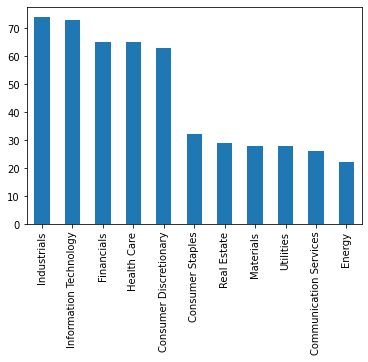

In [ ]:
pd.Series(rest['GICS Sector']).value_counts().plot(kind='bar')

### Correlação

In [ ]:
rest_num=rest[['sentimento 2016','retorno_1d 2016','sentimento 2017','retorno_1d 2017','sentimento 2018','retorno_1d 2018','sentimento 2019','retorno_1d 2019','sentimento 2020','retorno_1d 2020']]

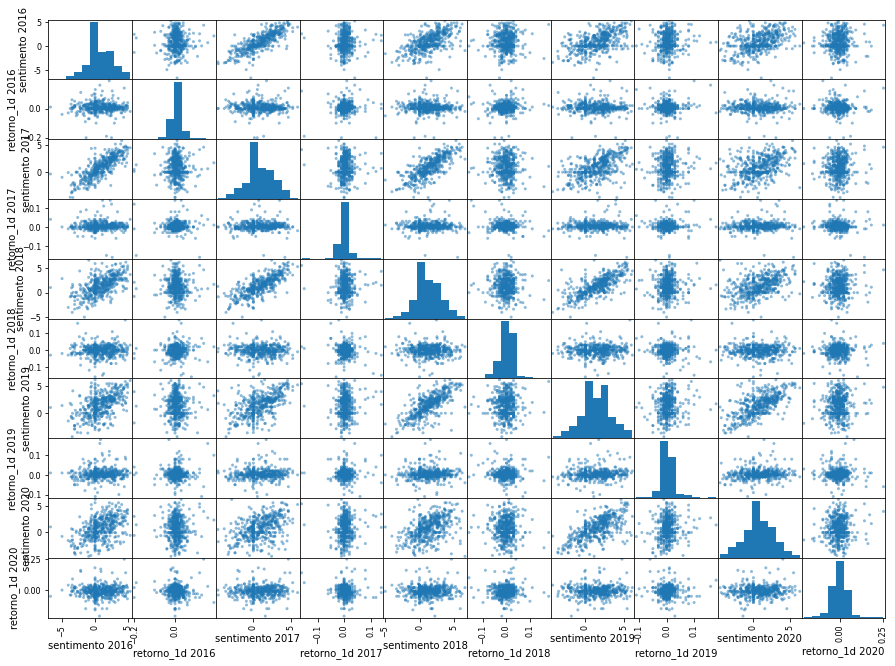

In [ ]:
plt.rcParams['figure.figsize'] = [15,11]
pd.plotting.scatter_matrix(rest_num);


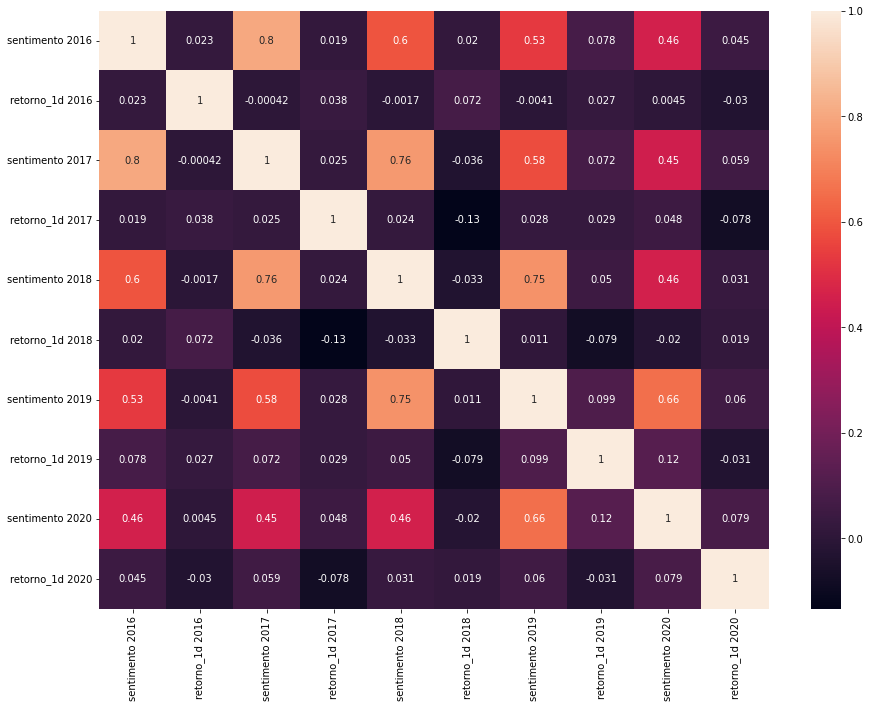

In [ ]:
sb.heatmap(rest_num.corr(),annot=True)

Aparentemente existe correlação maior entre os sentimentos. O que faz sentido já que provavelmente os comentários são feitos pelo mesmo time de RI e CEO. Vejamos como essas variáveis comportam entre si.

In [ ]:
rest_sent=rest[['sentimento 2016','sentimento 2017','sentimento 2018','sentimento 2019','sentimento 2020']]

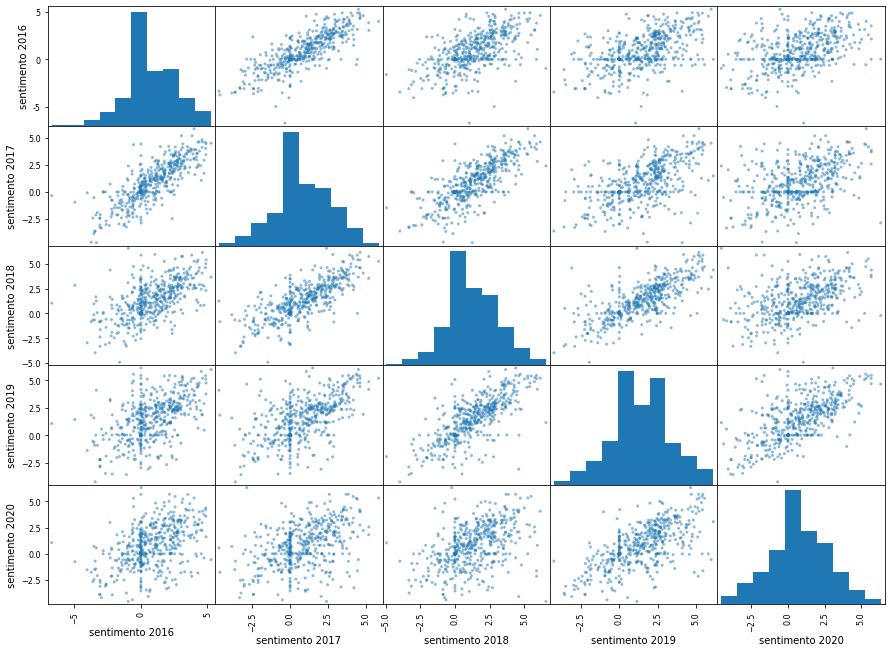

In [ ]:
pd.plotting.scatter_matrix(rest_sent);

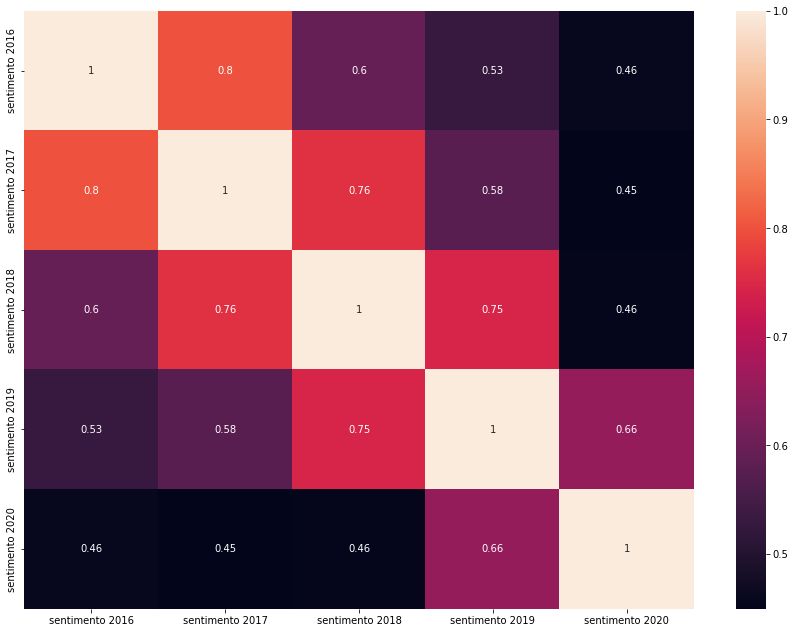

In [ ]:
sb.heatmap(rest_sent.corr(),annot=True)

Aparentemente temos um forte componente autoregressivo visto que sentimentos apresentam alta correlação com os períodos mais recentes.

## Executar o modelo com todas as variaveis do dataset

In [ ]:
x = sm.add_constant(rest['sentimento 2016'])
y = rest['retorno_1d 2016'] 
rlinear = sm.OLS(y,x).fit()
print(rlinear.summary())

                            OLS Regression Results                            
Dep. Variable:        retorno_1d 2016   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.2615
Date:                Mon, 18 Oct 2021   Prob (F-statistic):              0.609
Time:                        20:38:34   Log-Likelihood:                 994.66
No. Observations:                 505   AIC:                            -1985.
Df Residuals:                     503   BIC:                            -1977.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0064      0.002     

In [ ]:
x = sm.add_constant(rest['sentimento 2017'])
y = rest['retorno_1d 2017'] 
rlinear = sm.OLS(y,x).fit()
print(rlinear.summary())

                            OLS Regression Results                            
Dep. Variable:        retorno_1d 2017   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.3025
Date:                Mon, 18 Oct 2021   Prob (F-statistic):              0.583
Time:                        20:38:34   Log-Likelihood:                 1205.4
No. Observations:                 505   AIC:                            -2407.
Df Residuals:                     503   BIC:                            -2398.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0038      0.001     

In [ ]:
x = sm.add_constant(rest['sentimento 2018'])
y = rest['retorno_1d 2018'] 
rlinear = sm.OLS(y,x).fit()
print(rlinear.summary())

                            OLS Regression Results                            
Dep. Variable:        retorno_1d 2018   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.5500
Date:                Mon, 18 Oct 2021   Prob (F-statistic):              0.459
Time:                        20:38:34   Log-Likelihood:                 1015.4
No. Observations:                 505   AIC:                            -2027.
Df Residuals:                     503   BIC:                            -2018.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.0015      0.002     

In [ ]:
x = sm.add_constant(rest['sentimento 2019'])
y = rest['retorno_1d 2019'] 
rlinear = sm.OLS(y,x).fit()
print(rlinear.summary())

                            OLS Regression Results                            
Dep. Variable:        retorno_1d 2019   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     4.989
Date:                Mon, 18 Oct 2021   Prob (F-statistic):             0.0260
Time:                        20:38:34   Log-Likelihood:                 1114.6
No. Observations:                 505   AIC:                            -2225.
Df Residuals:                     503   BIC:                            -2217.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0025      0.001     

In [ ]:
x = sm.add_constant(rest['sentimento 2020'])
y = rest['retorno_1d 2020'] 
rlinear = sm.OLS(y,x).fit()
print(rlinear.summary())

                            OLS Regression Results                            
Dep. Variable:        retorno_1d 2020   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     3.183
Date:                Mon, 18 Oct 2021   Prob (F-statistic):             0.0750
Time:                        20:38:34   Log-Likelihood:                 856.63
No. Observations:                 505   AIC:                            -1709.
Df Residuals:                     503   BIC:                            -1701.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.0100      0.002     

A única análise de sentimento que foi estatísticamente significante à 5% de significância foram os releases reportados em 2019, relativos ao exercício de 2018.

##Análise de regressão entre os sentimentos anteriores

In [ ]:
x = sm.add_constant(rest[['sentimento 2016','sentimento 2017','sentimento 2018','sentimento 2019']])
y = rest['sentimento 2020'] 
rlinear = sm.OLS(y,x).fit()
print(rlinear.summary())

                            OLS Regression Results                            
Dep. Variable:        sentimento 2020   R-squared:                       0.460
Model:                            OLS   Adj. R-squared:                  0.456
Method:                 Least Squares   F-statistic:                     106.6
Date:                Mon, 18 Oct 2021   Prob (F-statistic):           1.22e-65
Time:                        20:38:34   Log-Likelihood:                -908.51
No. Observations:                 505   AIC:                             1827.
Df Residuals:                     500   BIC:                             1848.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.1496      0.082     

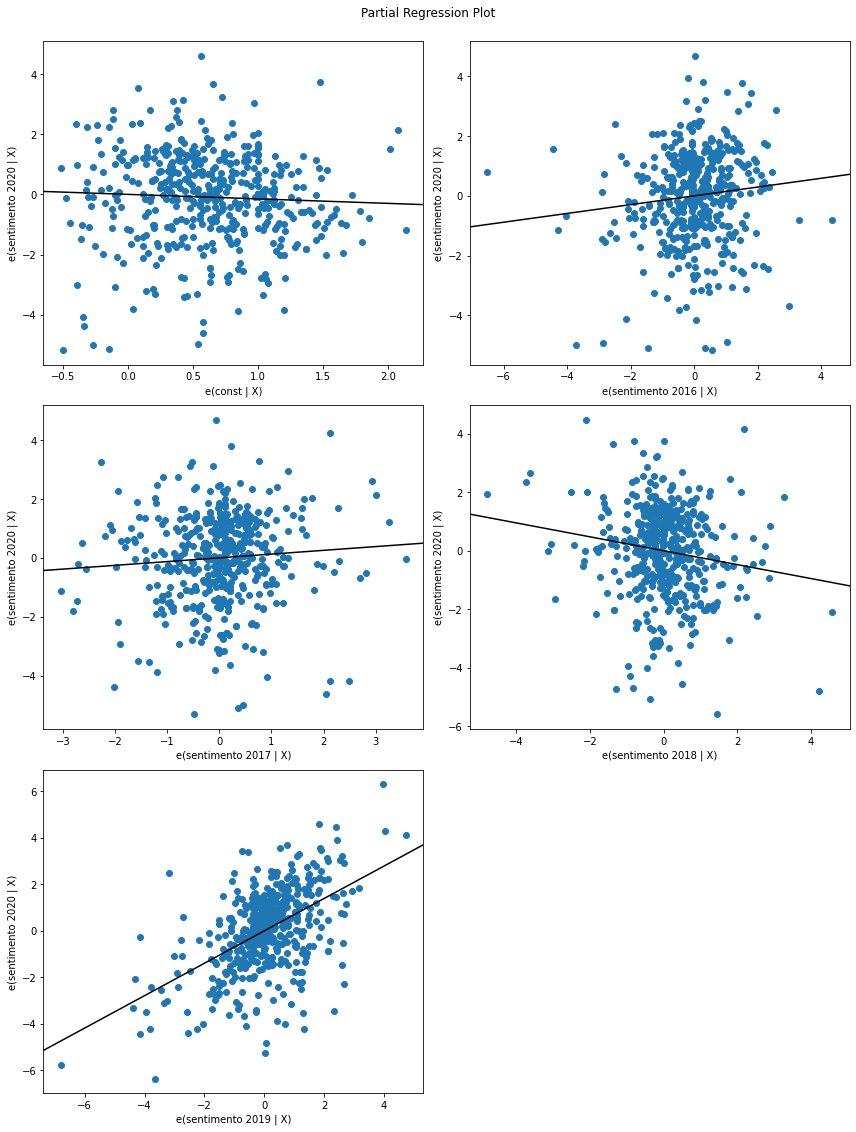

In [ ]:
fig = plt.figure(figsize=(12, 16))
sm.graphics.plot_partregress_grid(rlinear, fig=fig);

###Não Multicolinearidade

In [ ]:
pd.Series([variance_inflation_factor(x.values, i) 
           for i in range(x.shape[1])], 
           index=x.columns)

const              1.563139
sentimento 2016    2.911266
sentimento 2017    4.359185
sentimento 2018    3.653024
sentimento 2019    2.341289
dtype: float64

Nenhum ficou acima de 5. Apesar da matriz de correlação indicar que as variaveis preditoras teriam correlação alta.

In [ ]:
x = sm.add_constant(rest[['sentimento 2018','sentimento 2019']])
y = rest['sentimento 2020'] 
rlinear = sm.OLS(y,x).fit()
print(rlinear.summary())

                            OLS Regression Results                            
Dep. Variable:        sentimento 2020   R-squared:                       0.432
Model:                            OLS   Adj. R-squared:                  0.430
Method:                 Least Squares   F-statistic:                     191.0
Date:                Mon, 18 Oct 2021   Prob (F-statistic):           2.05e-62
Time:                        20:38:36   Log-Likelihood:                -921.39
No. Observations:                 505   AIC:                             1849.
Df Residuals:                     502   BIC:                             1861.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.1710      0.083     

In [ ]:
x = sm.add_constant(rest['sentimento 2019'])
y = rest['sentimento 2020'] 
rlinear = sm.OLS(y,x).fit()
print(rlinear.summary())

                            OLS Regression Results                            
Dep. Variable:        sentimento 2020   R-squared:                       0.430
Model:                            OLS   Adj. R-squared:                  0.429
Method:                 Least Squares   F-statistic:                     379.1
Date:                Mon, 18 Oct 2021   Prob (F-statistic):           2.41e-63
Time:                        20:38:36   Log-Likelihood:                -922.45
No. Observations:                 505   AIC:                             1849.
Df Residuals:                     503   BIC:                             1857.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.1919      0.082     

A equação considerando a apenas variáveis significantes a 5% pode ser construída pela saída do modelo:

$$Sentimento2020 = -0.19 + 0.67*Sentimento2019 $$

#### Significância

Vemos que todos os coeficientessão significativos, exceto serviço pois seu p-valor é maior que o alpha escolhido (5%). O modelo é em geral significante do ponto de vista do teste F global (menor que 5%).

#### $R^2$ Ajustado

O coeficiente de determinação utilizado deve ser o $R²$ ajustado, pois estamos lidando com um modelo de regressão linear multiplo. Este é 0.429, ou seja, 43% da variabilidade dos preços é explicado pelo modelo.

##Investigar as Premissas

#### Homocedasticidade e Independência do Resíduos

In [ ]:
graph_plotter = graphs.AssumptionGraphs(rlinear)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


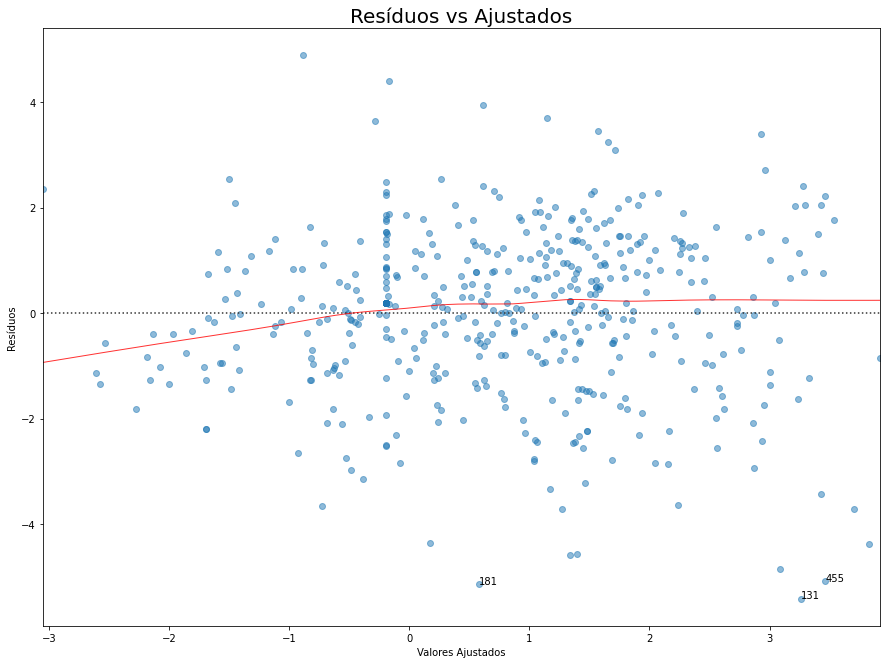

In [ ]:
graph_plotter.plot_residual_fitted_values(y)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


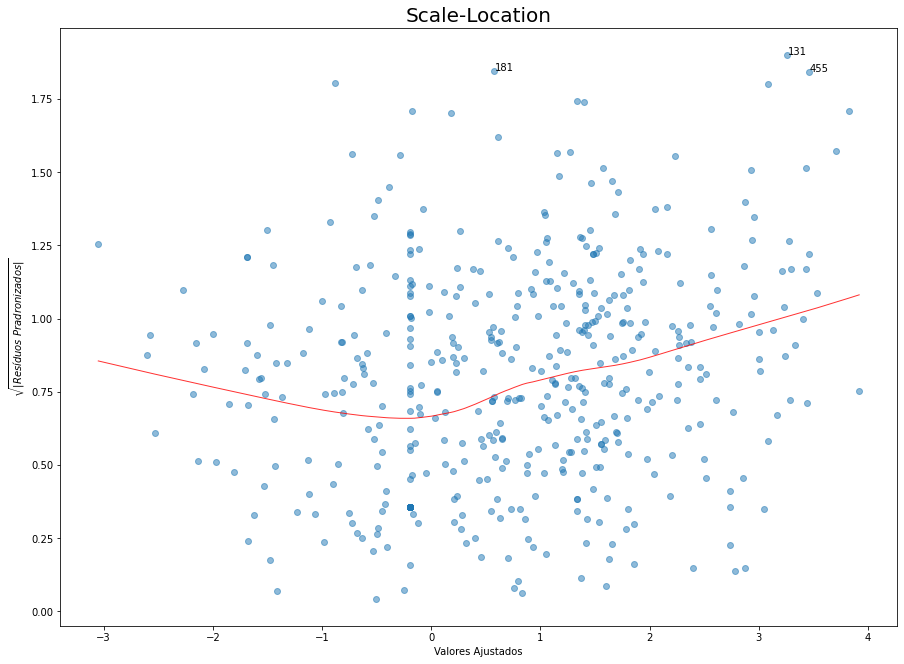

In [ ]:
graph_plotter.plot_scale_location()

No gráfico de Scale-Location se observa uma linha mais horizontal, sendo uma pequena tendência para cima.

#### Normalidade

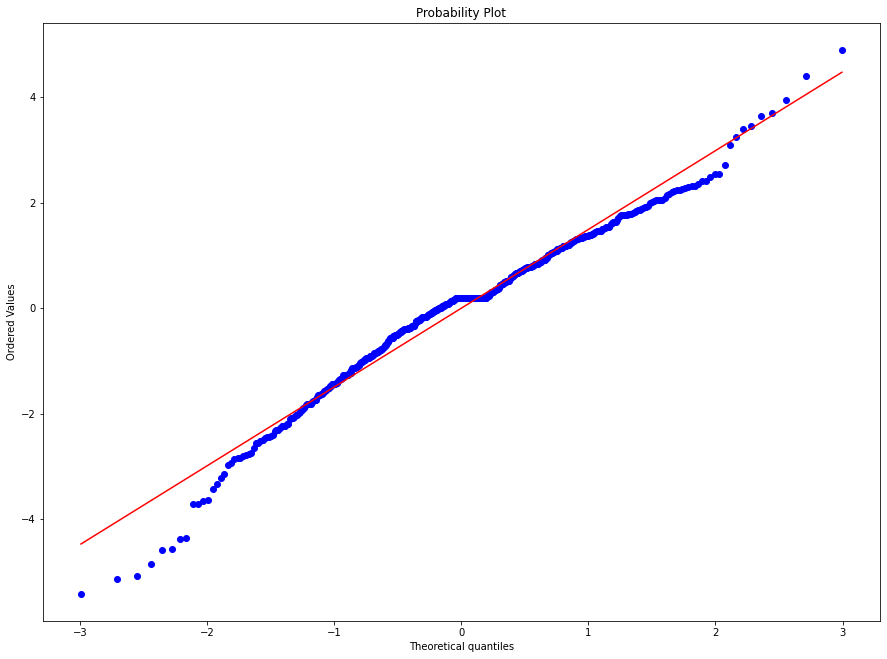

In [ ]:
graph_plotter.plot_qq()

A princípio os valores estão bem ajustados a reta, portanto não viola a hipótese de normalidade.



### Detectação de Outliers

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


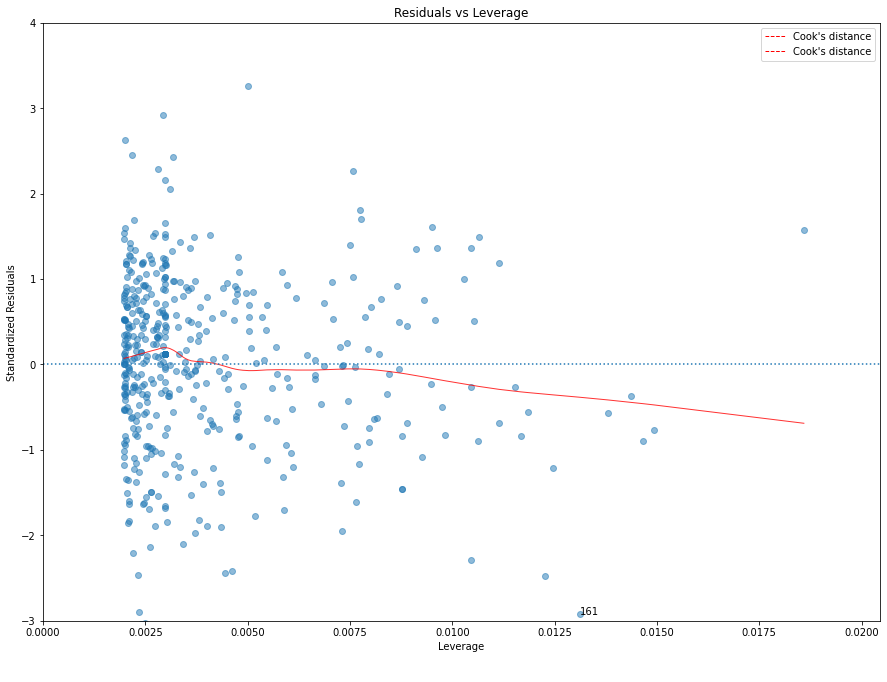

In [ ]:
graph_plotter.plot_influence()

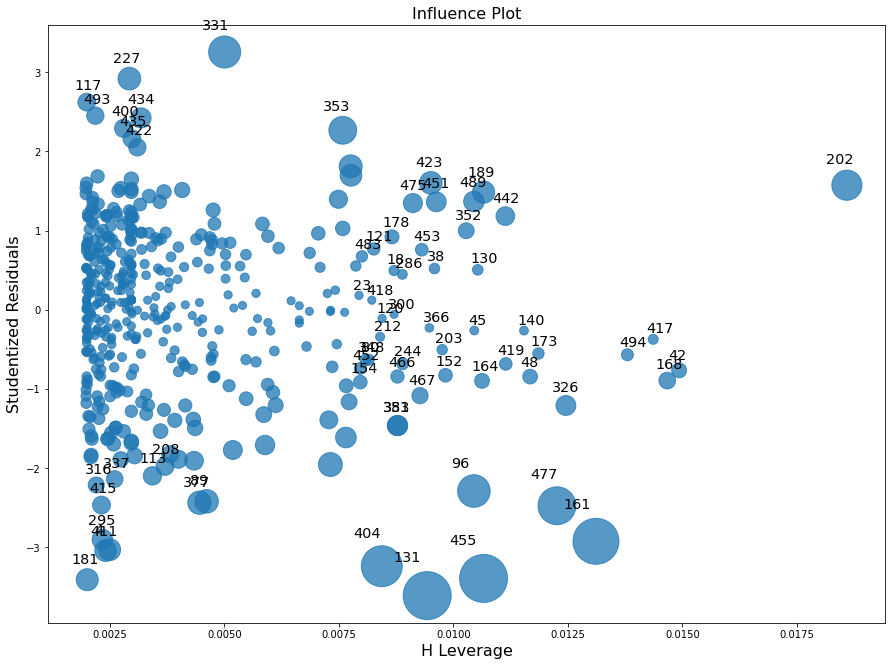

In [ ]:
rlinear.get_influence().plot_influence();

In [ ]:
rest_num=rest[['GICS Sector','sentimento 2016','retorno_1d 2016','sentimento 2017','retorno_1d 2017','sentimento 2018','retorno_1d 2018','sentimento 2019','retorno_1d 2019','sentimento 2020','retorno_1d 2020']]
x=rest_num.groupby(by='GICS Sector').mean()
x.head(10)

,sentimento 2016,retorno_1d 2016,sentimento 2017,retorno_1d 2017,sentimento 2018,retorno_1d 2018,sentimento 2019,retorno_1d 2019,sentimento 2020,retorno_1d 2020
GICS Sector,,,,,,,,,,
Communication Services,0.471538,0.009231,0.839231,0.001538,0.907692,-0.015769,0.599615,0.015000,0.263846,-0.011538
Consumer Discretionary,1.693333,0.011111,1.709524,-0.000317,1.844762,0.001111,1.907778,-0.002222,0.903016,-0.003810
Consumer Staples,0.694688,0.007500,0.790312,0.006250,1.260000,-0.006875,1.137813,0.007187,0.344062,-0.003437
Energy,-1.160909,0.005455,-1.068636,0.001364,-0.029545,-0.006818,0.601364,0.000000,-0.108636,-0.016364
Financials,0.287077,0.005846,0.467846,0.004000,0.925385,-0.003231,1.002154,0.005538,0.761692,-0.021231
Health Care,1.029385,0.009846,1.118462,0.008308,1.125692,-0.002308,1.312769,0.007231,0.959231,-0.006308
Industrials,1.058108,0.003514,0.748108,0.005000,1.658514,-0.002432,2.227703,0.005000,1.147703,-0.015270
Information Technology,1.059041,0.008904,1.211096,0.003288,2.140822,-0.000411,1.986027,0.004658,0.928904,0.002466
Materials,0.235714,0.010357,0.083214,0.004643,0.669643,-0.001786,0.923214,0.003929,0.381786,-0.003571


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

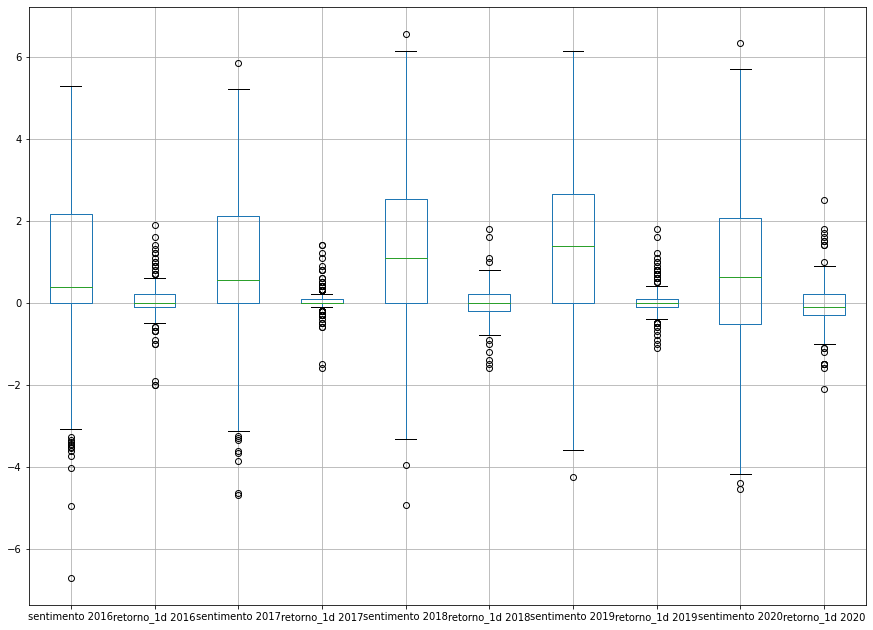

In [ ]:
rest_num['retorno_1d 2016']=rest_num['retorno_1d 2016']*10
rest_num['retorno_1d 2017']=rest_num['retorno_1d 2017']*10
rest_num['retorno_1d 2018']=rest_num['retorno_1d 2018']*10
rest_num['retorno_1d 2019']=rest_num['retorno_1d 2019']*10
rest_num['retorno_1d 2020']=rest_num['retorno_1d 2020']*10
rest_num.boxplot()

Vemos que existe uma tendência da empresa superestimar seus resultados em comparação a resposta do mercado, visto que os retornos de mercado pós divulgação dos resultados são mais simétricos que o sentimento demonstrado nos resultados onde existe um deslocamento grande a favor de sentimentos positivos.